<a href="https://colab.research.google.com/github/MuhammmadJamil2001/tugas-bengkelkoding/blob/main/Workshop2_cleveland_A11_2020_12567.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bimbingan Karir Data Science

Nama: Muhammad Jamil
NIM: A11.2020.12567
Kelas: BKDS01

Table of Contents

- 1) [Pengumpulan Data](#section_1)
- 2) [Menelaah Data](#section_2)
- 3) [Visualiasi Data](#section_3)
- 4) [Menentukan Object Data](#section_4)
- 5) [Membersihkan Data](#section_5)
- 6) [Konstruksi Data](#section_6)
- 7) [Menentukan Label Data](#section_7)
- 8) [Membangun Model](#section_8)
- 9) [Mengevaluasi Hasil Pemodelan](#section_9)
- 10) [Kesimpulan](#section_10)



<a name="section_1"></a>

## 1) Pengumpulan Data
Adapun dataset yang digunakan adalah dataset yang bersumber dari: https://archive.ics.uci.edu/dataset/45/heart+disease.
Dataset yang dipakai adalah Clevelanad database

<a name="section_2"></a>

## 2) Menelaah Data

Import library yang diperlukan untuk proses tela'ah data

In [ ]:
import pandas as pd
import re
import numpy as np
import itertools

**Load** Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #

Mounted at /content/drive


In [ ]:
# Menampilkan semua file dan sub-direktori dalam direktori hungarian.data di Google Drive
!ls "/content/drive/MyDrive/Dataset/cleveland.data"

/content/drive/MyDrive/Dataset/cleveland.data


In [ ]:
# Menyimpan dalam variabel
# Jika file disimpan di local dapat menggunakan : dir = 'hungarian.data' dan tidak perlu menghubungkan gcolab dengan gdrive
# Jika file disimpan digrive :
dir = "/content/drive/MyDrive/Dataset/cleveland.data"

In [ ]:
with open(dir, encoding='Latin1') as file:
  lines = [line.strip() for line in file]

lines[0:10]

['1 0 63 1 -9 -9 -9',
 '-9 1 145 1 233 -9 50 20',
 '1 -9 1 2 2 3 81 0',
 '0 0 0 0 1 10.5 6 13',
 '150 60 190 90 145 85 0 0',
 '2.3 3 -9 172 0 -9 -9 -9',
 '-9 -9 -9 6 -9 -9 -9 2',
 '16 81 0 1 1 1 -9 1',
 '-9 1 -9 1 1 1 1 1',
 '1 1 -9 -9 name']

Setelah membaca file dataset lakukan iterasi sesuai jumlah kolom dan baris yang ada pada dataset. Untuk keterangan kolom dan baris dapat
dilihat melalui deskripsi dataset yang sudah dijelaskan sebelumnya

In [ ]:
data = itertools.takewhile(
    lambda x: len(x) == 76, (' '.join(lines[i:(i+10)]).split() for i in range(0, len(lines), 10))
)

df = pd.DataFrame.from_records(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1,0,63,1,-9,-9,-9,-9,1,145,...,1,1,1,1,1,1,1,-9,-9,name
1,2,0,67,1,-9,-9,-9,-9,4,160,...,1,1,1,1,1,1,1,-9,-9,name
2,3,0,67,1,-9,-9,-9,-9,4,120,...,2,2,1,1,1,7,3,-9,-9,name
3,4,0,37,1,-9,-9,-9,-9,3,130,...,1,1,1,1,1,1,1,-9,-9,name
4,6,0,41,0,-9,-9,-9,-9,2,130,...,1,1,1,1,1,1,1,-9,-9,name


Menampilkan informasi dari file dataset yang sudah dimasukkan kedalam dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       282 non-null    object
 1   1       282 non-null    object
 2   2       282 non-null    object
 3   3       282 non-null    object
 4   4       282 non-null    object
 5   5       282 non-null    object
 6   6       282 non-null    object
 7   7       282 non-null    object
 8   8       282 non-null    object
 9   9       282 non-null    object
 10  10      282 non-null    object
 11  11      282 non-null    object
 12  12      282 non-null    object
 13  13      282 non-null    object
 14  14      282 non-null    object
 15  15      282 non-null    object
 16  16      282 non-null    object
 17  17      282 non-null    object
 18  18      282 non-null    object
 19  19      282 non-null    object
 20  20      282 non-null    object
 21  21      282 non-null    object
 22  22      282 non-null    ob

Pada kondisi dataset yang kita miliki terdapat kondisi khusus yang dimana sebelum memasuki tahap validasi data untuk tipe data object atau
string perlu dilakukan penghapusan fitur dikarenakan pada dataset ini nilai null disimbolkan dengan angka -9.0

In [ ]:
df = df.iloc[:,:-1] #Menghilangkan Kolom 75 Karna tidak berguna
df = df.drop(df.columns[0], axis=1)
df

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0,63,1,-9,-9,-9,-9,1,145,1,...,-9,1,1,1,1,1,1,1,-9,-9
1,0,67,1,-9,-9,-9,-9,4,160,1,...,-9,1,1,1,1,1,1,1,-9,-9
2,0,67,1,-9,-9,-9,-9,4,120,1,...,-9,2,2,1,1,1,7,3,-9,-9
3,0,37,1,-9,-9,-9,-9,3,130,0,...,-9,1,1,1,1,1,1,1,-9,-9
4,0,41,0,-9,-9,-9,-9,2,130,1,...,-9,1,1,1,1,1,1,1,-9,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0,39,0,-9,-9,-9,-9,3,138,1,...,-9,1,1,1,1,1,1,2,-9,-9
278,0,57,1,-9,-9,-9,-9,2,154,0,...,-9,1,1,1,1,1,1,1,-9,-9
279,0,58,0,-9,-9,-9,-9,4,130,1,...,-9,1,1,1,1,1,1,1,-9,-9
280,0,57,1,-9,-9,-9,-9,4,110,1,...,-9,1,2,1,1,1,1,1,-9,-9


Mengubah tipe data file dataset menjadi tipe data float sesuai dengan nilai null yaitu -9.0

In [ ]:
df = df.astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       282 non-null    float64
 1   2       282 non-null    float64
 2   3       282 non-null    float64
 3   4       282 non-null    float64
 4   5       282 non-null    float64
 5   6       282 non-null    float64
 6   7       282 non-null    float64
 7   8       282 non-null    float64
 8   9       282 non-null    float64
 9   10      282 non-null    float64
 10  11      282 non-null    float64
 11  12      282 non-null    float64
 12  13      282 non-null    float64
 13  14      282 non-null    float64
 14  15      282 non-null    float64
 15  16      282 non-null    float64
 16  17      282 non-null    float64
 17  18      282 non-null    float64
 18  19      282 non-null    float64
 19  20      282 non-null    float64
 20  21      282 non-null    float64
 21  22      282 non-null    float64
 22  23

<a name="section_3"></a>

## 3) Validasi Data
Tahap ini bertujuan untuk mengetahui dan memahami isi dari dataset agar dapat dilakukan penanganan sesuai dengan kondisinya

Mengubah nilai -9 menjadi null

In [ ]:
df.replace(-9.0, np.nan, inplace=True) #Menggganti nilai -9 menjadi NaN keseluruhan
df

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,63.0,1.0,NaN,NaN,NaN,NaN,1.0,145.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,67.0,1.0,NaN,NaN,NaN,NaN,4.0,160.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,67.0,1.0,NaN,NaN,NaN,NaN,4.0,120.0,1.0,...,NaN,2.0,2.0,1.0,1.0,1.0,7.0,3.0,NaN,NaN
3,0.0,37.0,1.0,NaN,NaN,NaN,NaN,3.0,130.0,0.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,41.0,0.0,NaN,NaN,NaN,NaN,2.0,130.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0.0,39.0,0.0,NaN,NaN,NaN,NaN,3.0,138.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,NaN
278,0.0,57.0,1.0,NaN,NaN,NaN,NaN,2.0,154.0,0.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
279,0.0,58.0,0.0,NaN,NaN,NaN,NaN,4.0,130.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
280,0.0,57.0,1.0,NaN,NaN,NaN,NaN,4.0,110.0,1.0,...,NaN,1.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [ ]:
df.isnull().sum()

1       0
2       0
3       0
4     282
5     282
     ... 
70      0
71      0
72      0
73    282
74    282
Length: 74, dtype: int64

In [ ]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,63.0,1.0,NaN,NaN,NaN,NaN,1.0,145.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,67.0,1.0,NaN,NaN,NaN,NaN,4.0,160.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,67.0,1.0,NaN,NaN,NaN,NaN,4.0,120.0,1.0,...,NaN,2.0,2.0,1.0,1.0,1.0,7.0,3.0,NaN,NaN
3,0.0,37.0,1.0,NaN,NaN,NaN,NaN,3.0,130.0,0.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,41.0,0.0,NaN,NaN,NaN,NaN,2.0,130.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       282 non-null    float64
 1   2       282 non-null    float64
 2   3       282 non-null    float64
 3   4       0 non-null      float64
 4   5       0 non-null      float64
 5   6       0 non-null      float64
 6   7       0 non-null      float64
 7   8       282 non-null    float64
 8   9       282 non-null    float64
 9   10      282 non-null    float64
 10  11      282 non-null    float64
 11  12      0 non-null      float64
 12  13      277 non-null    float64
 13  14      277 non-null    float64
 14  15      282 non-null    float64
 15  16      23 non-null     float64
 16  17      282 non-null    float64
 17  18      282 non-null    float64
 18  19      282 non-null    float64
 19  20      282 non-null    float64
 20  21      282 non-null    float64
 21  22      280 non-null    float64
 22  23

<a name="section_4"></a>

## 4) Menentukan Object Data
Memilih 14 fitur yang akan digunakan sesuai dengan deskripsi pada dataset

In [ ]:
df_selected = df.iloc[:, [1, 2, 7, 8, 10, 14, 17, 30, 36, 38, 39, 42, 49, 56]]
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       282 non-null    float64
 1   3       282 non-null    float64
 2   8       282 non-null    float64
 3   9       282 non-null    float64
 4   11      282 non-null    float64
 5   15      282 non-null    float64
 6   18      282 non-null    float64
 7   31      282 non-null    float64
 8   37      282 non-null    float64
 9   39      282 non-null    float64
 10  40      282 non-null    float64
 11  43      280 non-null    float64
 12  50      280 non-null    float64
 13  57      282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


Mengganti nama kolom sesuai dengan 14 nama kolom yang ada pada deskripsi dataset

In [ ]:
column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target'
}
df_selected.rename(columns=column_mapping, inplace=True)

<ipython-input-17-b484e5bfe3ce>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    float64
 11  ca        280 non-null    float64
 12  thal      280 non-null    float64
 13  target    282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


Menghitung jumlah fitur pada dataset

In [ ]:
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
29.0  1.0  2.0  130.0     204.0  0.0  2.0      202.0    0.0    0.0      1.0    0.0  3.0   0.0       1
59.0  1.0  1.0  178.0     270.0  0.0  2.0      145.0    0.0    4.2      3.0    0.0  7.0   0.0       1
           4.0  138.0     271.0  0.0  2.0      182.0    0.0    0.0      1.0    0.0  3.0   0.0       1
                135.0     234.0  0.0  0.0      161.0    0.0    0.5      2.0    0.0  7.0   0.0       1
                110.0     239.0  0.0  2.0      142.0    1.0    1.2      2.0    1.0  7.0   2.0       1
                                                                                                   ..
51.0  1.0  4.0  140.0     298.0  0.0  0.0      122.0    1.0    4.2      2.0    3.0  7.0   3.0       1
                          299.0  0.0  0.0      173.0    1.0    1.6      1.0    0.0  7.0   1.0       1
52.0  0.0  3.0  136.0     196.0  0.0  2.0      169.0    0.0    0.1      2.0    0.0  3.0

<a name="section_5"></a>

## 5) Membersihkan Data
Sebelum melakukan pemodelan dilakukan pembersihan data agar model yang dihasilkan lebih akurat

Menghitung jumlah null values yang ada diddalam dataset

In [ ]:
df_selected.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          2
thal        2
target      0
dtype: int64

Karena masih ada nilai null dibeberapa kolom fitur maka dilakukan pengisian nilai null (imputasi) menggunakan nilai mean di setiap kolomnya

In [ ]:
meanca = df_selected['ca'].dropna() #Ngedrop null
meanthal = df_selected['thal'].dropna()

meanca = meanca.astype(float) #Ngubah format
meanthal = meanthal.astype(float)

meanca = round(meanca.mean()) #Nyari Mean/Rata-rata
meanthal = round(meanthal.mean())

mengubah nilai null menjadi nilai mean yang sudah ditentukan sebelumnya

In [ ]:
fill_values = {'ca' : meanca,
               'thal' : meanthal}
df_clean = df_selected.fillna(value=fill_values) #Buat ngisi nilai null  dengan rata-rata

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    float64
 11  ca        282 non-null    float64
 12  thal      282 non-null    float64
 13  target    282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


In [ ]:
df_clean.isnull().sum() #Melakukan pengecekan apakah nilai nul masih ada

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Melakukan pengecekan apakah terdapat duplikasi data

In [ ]:
duplicate_rows = df_clean.duplicated()
df_clean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
print("All Duplicate Rows:")
df_clean[df_clean.duplicated(keep=False)] #pengecekan duplikat

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
df_clean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [ ]:
df_clean['target'].value_counts()

0.0    157
1.0     50
3.0     32
2.0     31
4.0     12
Name: target, dtype: int64

XXXXXXXXXXXXXXXXXXXXXXXX

Mencari korelasi antar fitur

In [ ]:
pip install seaborn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_clean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.091125,0.077383,0.274466,0.218295,0.104400,0.134438,-0.393266,0.087174,0.195740,0.156108,0.353728,0.103751,0.210747
sex,-0.091125,1.000000,0.022619,-0.058920,-0.189397,0.054396,0.032665,-0.054792,0.189095,0.103771,0.040438,0.095005,0.389126,0.239516
cp,0.077383,0.022619,1.000000,-0.070886,0.098889,-0.071550,0.061007,-0.318512,0.364757,0.173221,0.147143,0.208906,0.259609,0.383891
trestbps,0.274466,-0.058920,-0.070886,1.000000,0.157118,0.142902,0.128652,-0.029739,0.061072,0.197026,0.137713,0.080754,0.122973,0.151776
chol,0.218295,-0.189397,0.098889,0.157118,1.000000,0.019506,0.166490,-0.018392,0.088988,0.044771,0.000546,0.129764,0.040570,0.098895
fbs,0.104400,0.054396,-0.071550,0.142902,0.019506,1.000000,0.054025,0.019948,0.027573,-0.024812,0.056060,0.117625,0.064050,0.039690
restecg,0.134438,0.032665,0.061007,0.128652,0.166490,0.054025,1.000000,-0.082132,0.088781,0.107675,0.155901,0.112083,0.020806,0.187365
thalach,-0.393266,-0.054792,-0.318512,-0.029739,-0.018392,0.019948,-0.082132,1.000000,-0.374316,-0.344748,-0.384825,-0.254544,-0.256681,-0.396194
exang,0.087174,0.189095,0.364757,0.061072,0.088988,0.027573,0.088781,-0.374316,1.000000,0.285568,0.263093,0.151577,0.334712,0.398880
oldpeak,0.195740,0.103771,0.173221,0.197026,0.044771,-0.024812,0.107675,-0.344748,0.285568,1.000000,0.600446,0.253958,0.331229,0.487529


<Axes: >

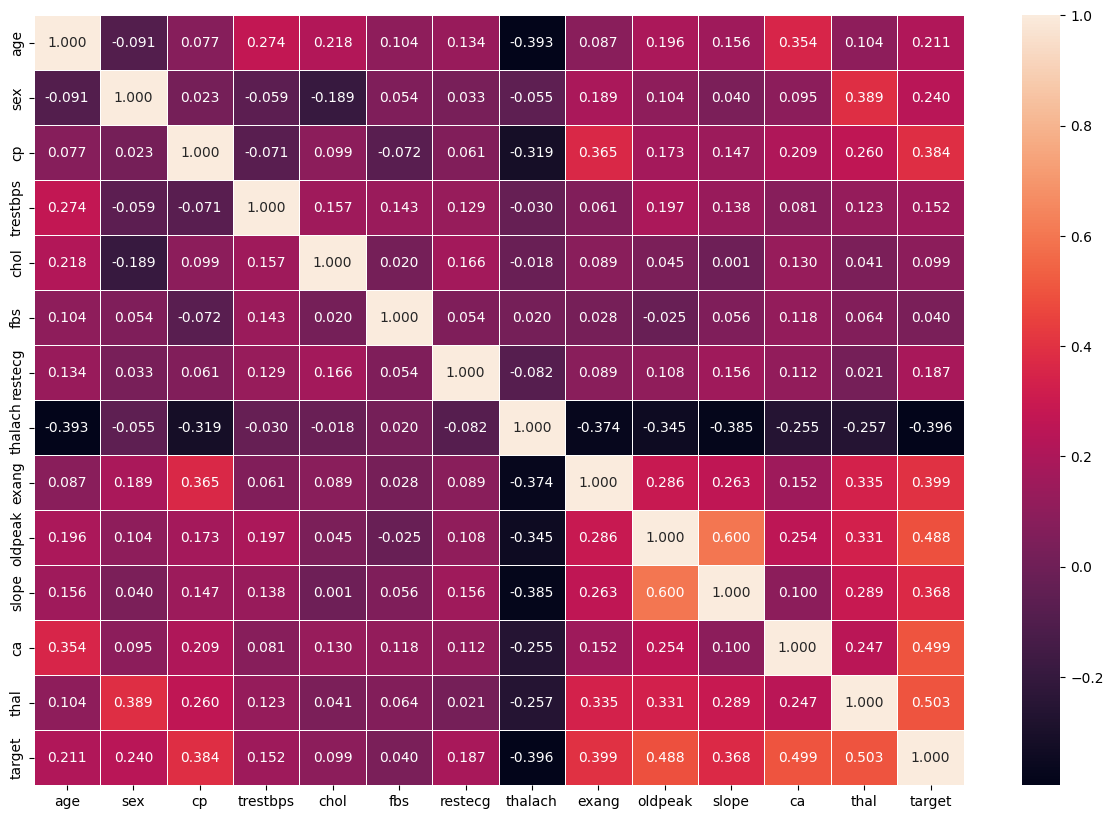

In [ ]:
corr_mat = df_clean.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr_mat, annot=True, linewidths=0.5, fmt=".3f")

<a name="section_6"></a>

## 6) Konstruksi Data
Dalam tahap ini Konstruksi data salah satu tujuannya yaitu untuk menyesuaikan semua tipe data yang ada di dalam dataset. Namun pada tahap ini dataset sudah memiliki tipe data yang sesuai sehingga tidak perlu dilakukan penyesuaian kembali

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    float64
 11  ca        282 non-null    float64
 12  thal      282 non-null    float64
 13  target    282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


In [ ]:
df_clean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


<a name="section_7"></a>
## 7) Menentukan Label Data

In [ ]:
x = df_clean.drop("target", axis=1).values
y = df_clean.iloc[:,-1]

Melakukan Visualisasi Terhadap Target

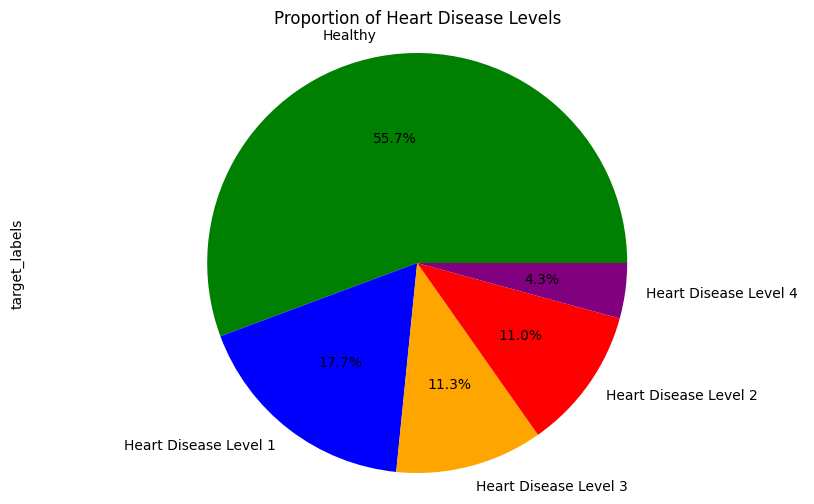

In [ ]:
import matplotlib.pyplot as plt

# Mapping kelas ke label yang lebih deskriptif
class_labels = {
    0: 'Healthy',
    1: 'Heart Disease Level 1',
    2: 'Heart Disease Level 2',
    3: 'Heart Disease Level 3',
    4: 'Heart Disease Level 4'
}

# Mengganti nilai kelas dengan label yang sesuai
df_clean['target_labels'] = df_clean['target'].map(class_labels)

# Membuat pie chart
df_clean['target_labels'].value_counts().plot(kind='pie', figsize=(10, 6), autopct='%1.1f%%', colors=['green', 'blue', 'orange', 'red', 'purple'])
plt.title("Proportion of Heart Disease Levels")
plt.axis('equal')
plt.show()

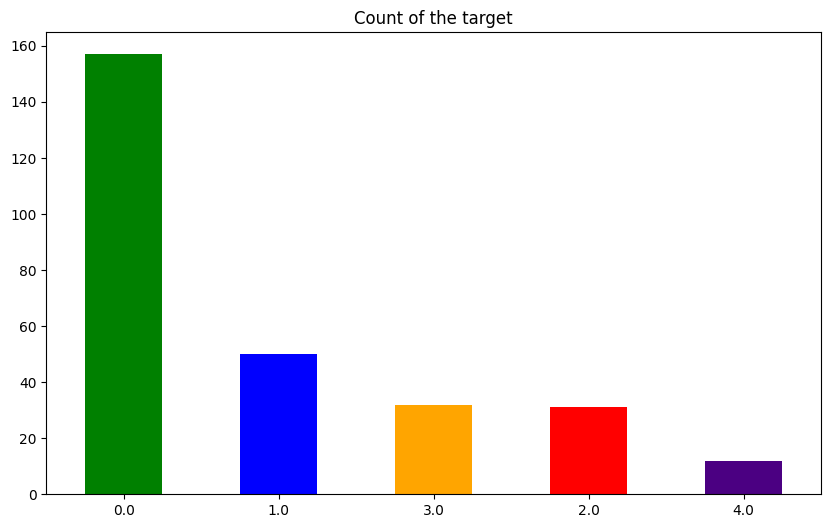

In [ ]:
df_clean['target'].value_counts().plot(kind='bar', figsize=(10,6), color=['green', 'blue', 'orange', 'red', 'indigo'])
plt.title("Count of the target")
plt.xticks(rotation=0);

In [ ]:
pip install imbalanced-learn

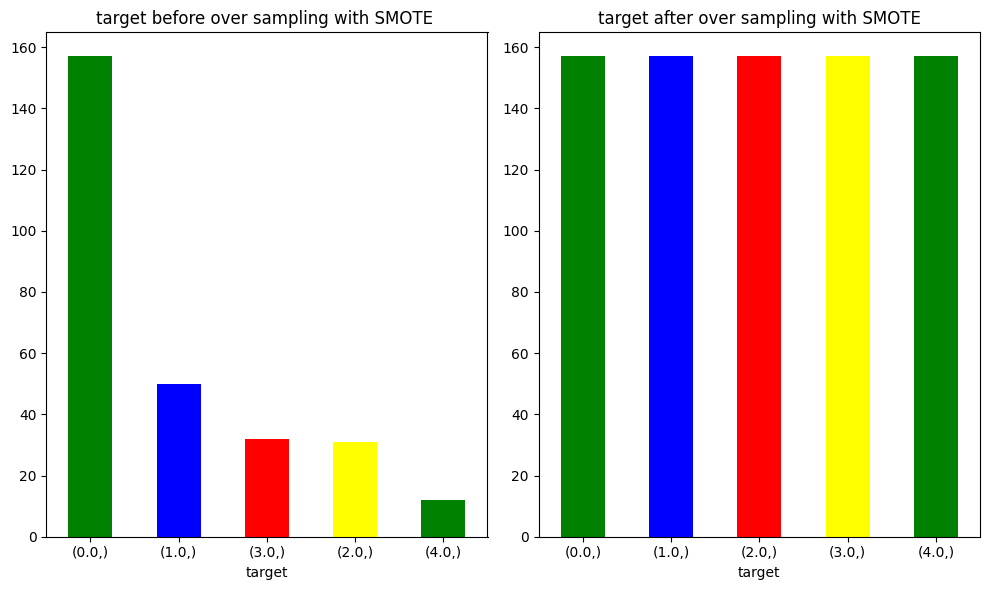

In [ ]:
from imblearn.over_sampling import SMOTE

# oversampling
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(x, y)
plt.figure(figsize=(12, 4))
new_df1 = pd.DataFrame(data=y)
plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target before over sampling with SMOTE ")
plt.xticks(rotation=0);
plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target after over sampling with SMOTE")
plt.xticks(rotation=0);
plt.tight_layout()
plt.show()

In [ ]:
new_df1 = pd.DataFrame(data=y) #Setelah dilakukan oversample grafik menunjukan keseimbangan hal ini bertujuan untuk menghasilkan akurasi lebih bagus
new_df1.value_counts()

target
0.0       157
1.0        50
3.0        32
2.0        31
4.0        12
dtype: int64

In [ ]:
# over
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts()

target
0.0       157
1.0       157
2.0       157
3.0       157
4.0       157
dtype: int64

In [ ]:
df_clean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,0.677305,3.163121,131.563830,249.092199,0.148936,1.014184,149.765957,0.326241,1.026950,1.585106,0.666667,4.680851,0.907801
std,9.053083,0.468338,0.955405,17.757496,51.217546,0.356658,0.998118,22.923869,0.469670,1.138825,0.609700,0.933113,1.932377,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,0.000000,2.000000,153.500000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,165.750000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)
len(X_smote_resampled_normal)

785

In [ ]:
dfcek1 = pd.DataFrame(X_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000
mean,0.559445,0.780664,0.811789,0.374596,0.285383,0.140162,0.602946,0.542237,0.456058,0.238072,0.381666,0.349198,0.639917
std,0.168570,0.374983,0.283246,0.149340,0.111147,0.310030,0.440893,0.161073,0.443026,0.180516,0.258547,0.323277,0.423356
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.458333,0.659984,0.666667,0.264151,0.207870,0.000000,0.000000,0.422710,0.000000,0.091628,0.097991,0.000000,0.119594
50%,0.583333,1.000000,1.000000,0.358491,0.280822,0.000000,0.887086,0.543578,0.348039,0.225806,0.500000,0.333333,0.892559
75%,0.678864,1.000000,1.000000,0.469468,0.356164,0.000000,1.000000,0.668935,1.000000,0.368408,0.500000,0.657261,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
# membagi fitur dan target menjadi data train dan test (untuk yang oversample saja)
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled)
# membagi fitur dan target menjadi data train dan test (untuk yang oversample + normalization)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42,stratify = y_smote_resampled)

<a name="section_8"></a>
## 8) Membangun Model

Pada tahap ini kita akan memulai untuk membangun sebuah model.

Dibawah ini merupakan sebuah fungsi untuk menampilkan hasil akurasi dan rata - rata dari recall , f1 dan precision score setiap model. Fungsi
ini nantinya akan dipanggil di setiap model. Membuat Fungsi ini bersifat opsional.

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score

def evaluation(Y_test,Y_pred):
    acc = accuracy_score(Y_test,Y_pred) #Mengukur seberapa akurat model dalam memprediksi kelas dari seluruh data.
    rcl = recall_score(Y_test,Y_pred,average = 'weighted') #Mengukur kemampuan model untuk menemukan kembali keseluruhan instance dari kelas yang benar.
    f1 = f1_score(Y_test,Y_pred,average = 'weighted') #Rata-rata harmonik dari precision dan recall. Digunakan untuk mengukur keseimbangan antara precision dan recall.
    ps = precision_score(Y_test,Y_pred,average = 'weighted') #Mengukur seberapa banyak dari kelas yang diprediksi oleh model sebagai positif yang memang benar-benar positif.

    metric_dict={'accuracy': round(acc,3),
                'recall': round(rcl,3),
                'F1 score': round(f1,3),
                'Precision score': round(ps,3)
                }
    return print(metric_dict)

## A. Oversample

### 1) Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier #Menggunakan Model Decision tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from tensorflow.keras.models import Sequential #Model CNN
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from sklearn.metrics import accuracy_score, classification_report


In [ ]:

# Mengganti model KNN dengan Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
# Melatih model Decision Tree dengan data latih
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Melakukan prediksi dengan model Decision Tree terhadap data uji
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Mengukur akurasi model
print("Decision Tree Model:")
accuracy_decision_tree_smote =  round(accuracy_score(y_test,y_pred_decision_tree),5)
print(f"Akurasi model Decision Tree: {accuracy_decision_tree_smote}")

# Menampilkan laporan klasifikasi
print("Classification Report:") #menghasilkan laporan klasifikasi yang menyediakan informasi terperinci tentang kinerja model terhadap data uji.
print(classification_report(y_test, y_pred_decision_tree))

Decision Tree Model:
Akurasi model Decision Tree: 0.70701
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.66      0.75        32
         1.0       0.50      0.55      0.52        31
         2.0       0.64      0.74      0.69        31
         3.0       0.67      0.75      0.71        32
         4.0       0.96      0.84      0.90        31

    accuracy                           0.71       157
   macro avg       0.73      0.71      0.71       157
weighted avg       0.73      0.71      0.71       157



In [ ]:
evaluation(y_test, y_pred_decision_tree)

{'accuracy': 0.707, 'recall': 0.707, 'F1 score': 0.713, 'Precision score': 0.729}


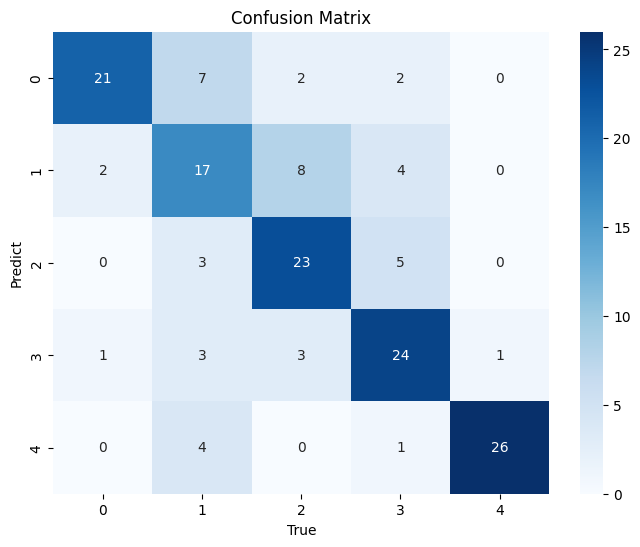

In [ ]:
#Pada visualisasi ini ditampilkan visualisasi confusion matrix untuk membandingkan hasil prediksi model dengan nilai sebenarnya.
cm = confusion_matrix(y_test, y_pred_decision_tree)

#Visualisasi heatmap dari confusion matrix ini membantu dalam memahami seberapa baik model klasifikasi dapat memprediksi kelas tertentu.
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### 2) Random Forest

In [ ]:
# Selanjutnya kita akan membangun model dengan algoritma random forest dengan
# n_estimators yaitu 100, n_estimators sendiri berguna mengatur jumlah pohon keputusan
# yang akan dibangun

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.949
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93        32
         1.0       1.00      0.87      0.93        31
         2.0       0.91      0.94      0.92        31
         3.0       0.97      0.97      0.97        32
         4.0       1.00      1.00      1.00        31

    accuracy                           0.95       157
   macro avg       0.95      0.95      0.95       157
weighted avg       0.95      0.95      0.95       157



In [ ]:
evaluation(y_test, y_pred_rf)

{'accuracy': 0.949, 'recall': 0.949, 'F1 score': 0.949, 'Precision score': 0.952}


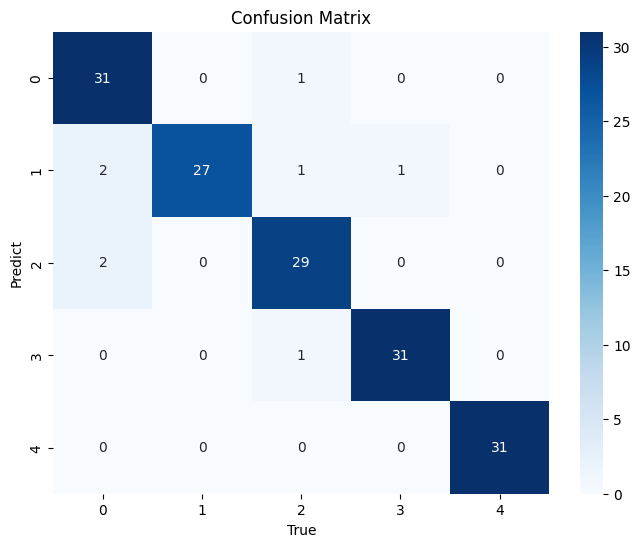

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)

#Visualisasi heatmap dari confusion matrix ini membantu dalam memahami seberapa baik model klasifikasi dapat memprediksi kelas tertentu.
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### 3) XGBoost

In [ ]:
# membangun model, kita akan menggunakan algoritma XGBoost dengan learning rate yaitu 0.1.
# learning rate berguna
# untuk mengontrol seberapa besar kita menyesuaikan bobot model.

xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Model:
Accuracy: 0.885
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88        32
         1.0       0.89      0.77      0.83        31
         2.0       0.87      0.87      0.87        31
         3.0       0.88      0.88      0.88        32
         4.0       0.97      0.97      0.97        31

    accuracy                           0.89       157
   macro avg       0.89      0.89      0.88       157
weighted avg       0.89      0.89      0.88       157



In [ ]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.885, 'recall': 0.885, 'F1 score': 0.885, 'Precision score': 0.887}


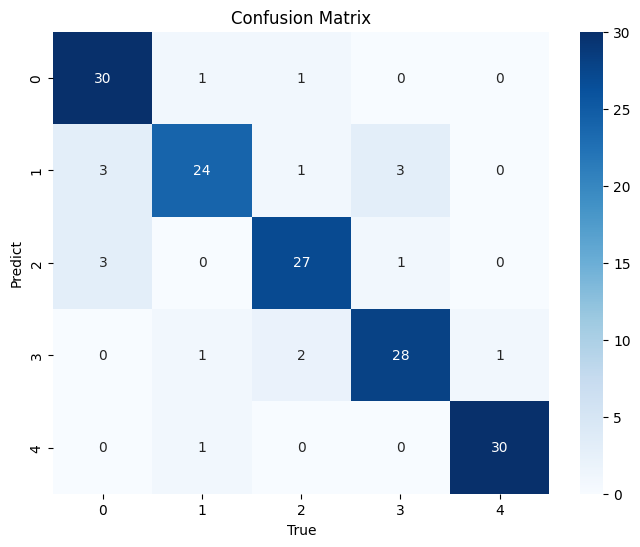

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb)

#Visualisasi heatmap dari confusion matrix ini membantu dalam memahami seberapa baik model klasifikasi dapat memprediksi kelas tertentu.
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### 4) Logistic **Regression**

In [ ]:
# Selanjutnya kita akan membangun model dengan algoritma Logistic Regression dengan
# n_estimators yaitu 100, n_estimators sendiri berguna mengatur jumlah pohon keputusan yang akan dibangun

lr_model = LogisticRegression(max_iter=10000, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [ ]:
#Berikut adalah kode program untuk menampilkan hasil akurasi dengan algoritma KNN
y_pred_lr = lr_model.predict(X_test)

# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_lr_smote = round(accuracy_score(y_test,y_pred_lr),3)
print("Accuracy:", accuracy_lr_smote)
print("Classification Report:") #menghasilkan laporan klasifikasi yang menyediakan informasi terperinci tentang kinerja model terhadap data uji.
print(classification_report(y_test, y_pred_lr))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.656
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83        32
         1.0       0.45      0.55      0.49        31
         2.0       0.72      0.68      0.70        31
         3.0       0.60      0.38      0.46        32
         4.0       0.70      0.84      0.76        31

    accuracy                           0.66       157
   macro avg       0.66      0.66      0.65       157
weighted avg       0.66      0.66      0.65       157



In [ ]:
evaluation(y_test,y_pred_lr)

{'accuracy': 0.656, 'recall': 0.656, 'F1 score': 0.65, 'Precision score': 0.659}


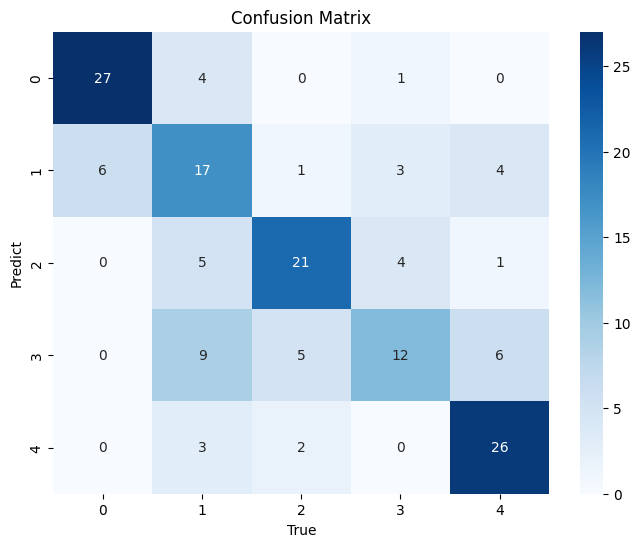

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### 5) CNN

In [ ]:
from tensorflow.keras.optimizers import Adam

# Adjust the learning rate in the optimizer
optimizer = Adam(learning_rate=0.0001)  # Example learning rate

# Change model architecture or add more complexity
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=200, batch_size=64, validation_split=0.1)


Epoch 1/200
9/9 [==============================] - 1s 30ms/step - loss: 38.2183 - accuracy: 0.2106 - val_loss: 31.9273 - val_accuracy: 0.0952
Epoch 2/200
9/9 [==============================] - 0s 8ms/step - loss: 26.9417 - accuracy: 0.2106 - val_loss: 19.8949 - val_accuracy: 0.0952
Epoch 3/200
9/9 [==============================] - 0s 9ms/step - loss: 16.7835 - accuracy: 0.2053 - val_loss: 11.6952 - val_accuracy: 0.1587
Epoch 4/200
9/9 [==============================] - 0s 8ms/step - loss: 12.8595 - accuracy: 0.1363 - val_loss: 10.1044 - val_accuracy: 0.1587
Epoch 5/200
9/9 [==============================] - 0s 6ms/step - loss: 11.2128 - accuracy: 0.1398 - val_loss: 8.1743 - val_accuracy: 0.1270
Epoch 6/200
9/9 [==============================] - 0s 9ms/step - loss: 8.9301 - accuracy: 0.1770 - val_loss: 6.7045 - val_accuracy: 0.1270
Epoch 7/200
9/9 [==============================] - 0s 7ms/step - loss: 7.4857 - accuracy: 0.2035 - val_loss: 5.4700 - val_accuracy: 0.1429
Epoch 8/200
9/9 [

### 6) SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
# Melakukan prediksi pada data uji
y_pred_svm = svm_model.predict(X_test)

# Evaluasi model SVM
print("Support Vector Machine (SVM) Model:")
accuracy_svm_smote = round(accuracy_score(y_test, y_pred_svm), 5)
print("Accuracy:", accuracy_svm_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))



Support Vector Machine (SVM) Model:
Accuracy: 0.43312
Classification Report:
              precision    recall  f1-score   support

         0.0       0.44      0.69      0.54        32
         1.0       0.31      0.16      0.21        31
         2.0       0.41      0.52      0.46        31
         3.0       0.45      0.16      0.23        32
         4.0       0.49      0.65      0.56        31

    accuracy                           0.43       157
   macro avg       0.42      0.43      0.40       157
weighted avg       0.42      0.43      0.40       157



In [ ]:
evaluation(y_test,y_pred_svm)

{'accuracy': 0.433, 'recall': 0.433, 'F1 score': 0.399, 'Precision score': 0.421}


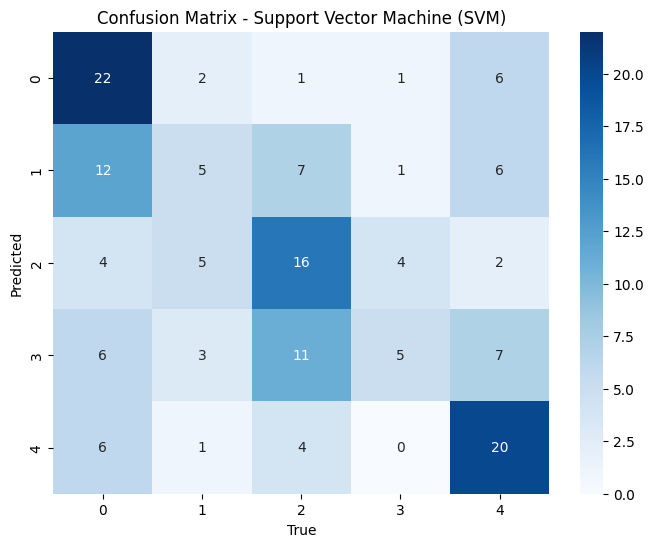

In [ ]:
# Plot Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Support Vector Machine (SVM)')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

## B. Oversample+Normalisasi

Pada bagian ini kita akan membuat sebuah model yang dimana data yang dipakai kali ini yang sudah dilakukan oversample dan normalisasi.

Algoritma yang digunakan sama seperti sebelumnya yaitu Decision Tree, Random Forest, dan XGBoost. Sekaligus dibuat visualisasi hasil evaluasi pada masing-masing model.

### 1) Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier #Menggunakan Model Decision tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Mengganti model KNN dengan Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
# Melatih model Decision Tree dengan data latih
decision_tree_model.fit(X_train_normal, y_train_normal)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Melakukan prediksi dengan model Decision Tree terhadap data uji
y_pred_decision_tree = decision_tree_model.predict(X_test_normal)

# Mengukur akurasi model
print("Decision Tree Model:")
accuracy_decision_tree_smote_normal = round(accuracy_score(y_test_normal, y_pred_decision_tree), 5)
print(f"Akurasi model Decision Tree: {accuracy_decision_tree_smote_normal}")

# Menampilkan laporan klasifikasi
print("Classification Report:") #menghasilkan laporan klasifikasi yang menyediakan informasi terperinci tentang kinerja model terhadap data uji.
print(classification_report(y_test_normal, y_pred_decision_tree))

Decision Tree Model:
Akurasi model Decision Tree: 0.70701
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.66      0.75        32
         1.0       0.50      0.55      0.52        31
         2.0       0.64      0.74      0.69        31
         3.0       0.67      0.75      0.71        32
         4.0       0.96      0.84      0.90        31

    accuracy                           0.71       157
   macro avg       0.73      0.71      0.71       157
weighted avg       0.73      0.71      0.71       157



In [ ]:
evaluation(y_test_normal, y_pred_decision_tree)

{'accuracy': 0.707, 'recall': 0.707, 'F1 score': 0.713, 'Precision score': 0.729}


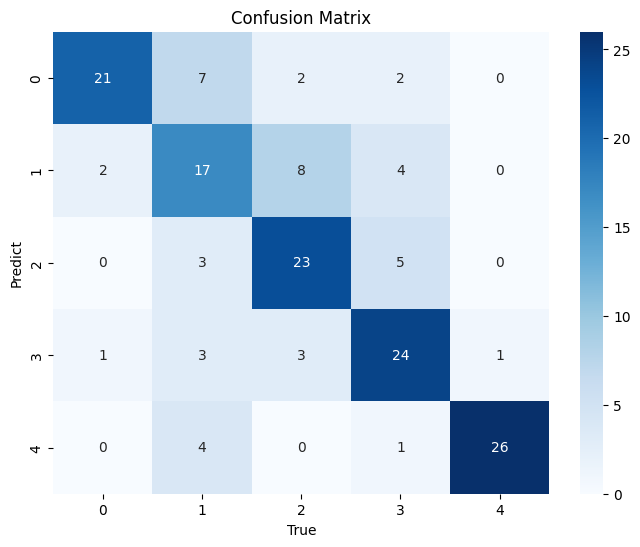

In [ ]:
#Pada visualisasi ini ditampilkan visualisasi confusion matrix untuk membandingkan hasil prediksi model dengan nilai sebenarnya.
cm = confusion_matrix(y_test_normal, y_pred_decision_tree)

#Visualisasi heatmap dari confusion matrix ini membantu dalam memahami seberapa baik model klasifikasi dapat memprediksi kelas tertentu.
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### 2) Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test_normal)

#membantu untuk mengevaluasi dan memahami di mana model dapat berkinerja dengan baik atau mungkin perlu peningkatan
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal )
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.949
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93        32
         1.0       1.00      0.87      0.93        31
         2.0       0.91      0.94      0.92        31
         3.0       0.97      0.97      0.97        32
         4.0       1.00      1.00      1.00        31

    accuracy                           0.95       157
   macro avg       0.95      0.95      0.95       157
weighted avg       0.95      0.95      0.95       157



In [ ]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.885, 'recall': 0.885, 'F1 score': 0.885, 'Precision score': 0.887}


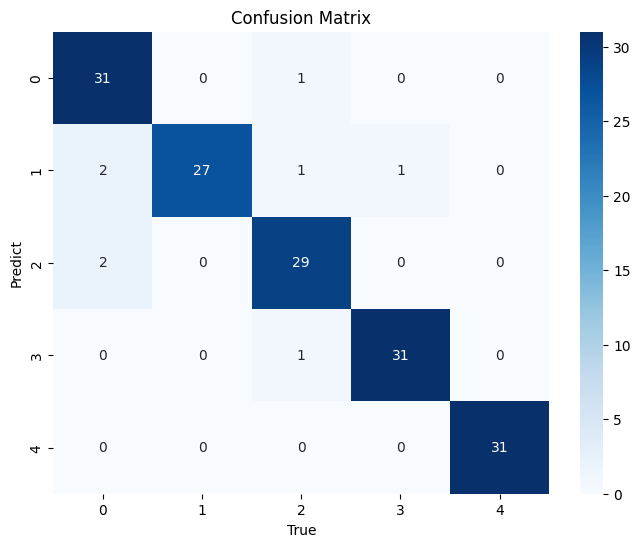

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_rf)

#Visualisasi heatmap dari confusion matrix ini membantu dalam memahami seberapa baik model klasifikasi dapat memprediksi kelas tertentu.
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### 3) XGBOOST

In [ ]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test_normal)

# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.885
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88        32
         1.0       0.89      0.77      0.83        31
         2.0       0.87      0.87      0.87        31
         3.0       0.88      0.88      0.88        32
         4.0       0.97      0.97      0.97        31

    accuracy                           0.89       157
   macro avg       0.89      0.89      0.88       157
weighted avg       0.89      0.89      0.88       157



In [ ]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.885, 'recall': 0.885, 'F1 score': 0.885, 'Precision score': 0.887}


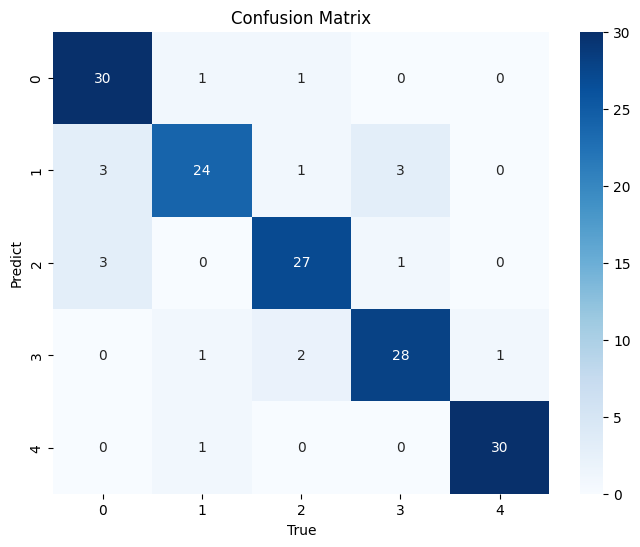

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

#Visualisasi heatmap dari confusion matrix ini membantu dalam memahami seberapa baik model klasifikasi dapat memprediksi kelas tertentu.
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### 4) SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_classifier = SVC(random_state=42)
svm_model.fit(X_train_normal, y_train_normal)

SVC(random_state=42)

In [ ]:
y_pred_svm = svm_model.predict(X_test_normal)

# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_svm_smote_normal = round(accuracy_score(y_test_normal,y_pred_svm),5)
print("Accuracy:", accuracy_svm_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_svm))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.78981
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83        32
         1.0       0.77      0.55      0.64        31
         2.0       0.78      0.81      0.79        31
         3.0       0.78      0.78      0.78        32
         4.0       0.79      0.97      0.87        31

    accuracy                           0.79       157
   macro avg       0.79      0.79      0.78       157
weighted avg       0.79      0.79      0.78       157



In [ ]:
evaluation(y_test_normal,y_pred_svm)

{'accuracy': 0.79, 'recall': 0.79, 'F1 score': 0.784, 'Precision score': 0.789}


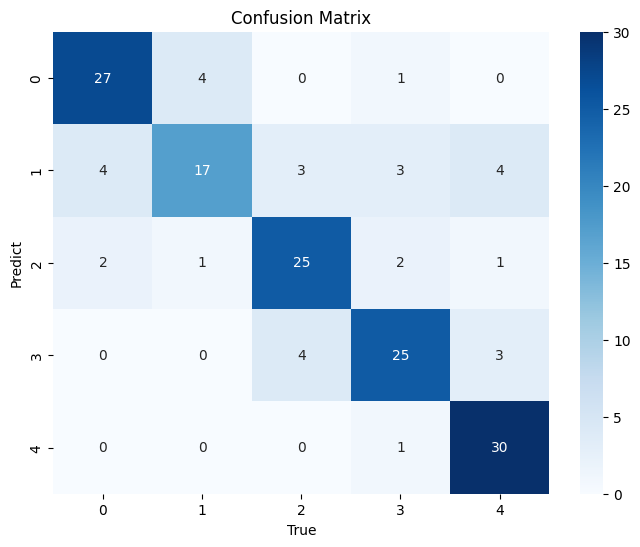

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_svm)

#Visualisasi heatmap dari confusion matrix ini membantu dalam memahami seberapa baik model klasifikasi dapat memprediksi kelas tertentu.
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

## C. Tunning + Normalization + Oversample

Model kali ini masih menggunakan algoritma yang sama (Decision Tree, Random Forest, dan XGBoost), namun data yang digunakan adalah data yang sudah dilakukan TunNIng Parameter, Normalisasi, dan Oversample.

### 1) Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Setiap parameter tunnning tidak selalu sama karena bergantung pada algoritma yang digunakan.
# Inisialisasi model Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Set hyperparameter yang akan ditelusuri untuk mencari yang terbaik
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Menggunakan RandomizedSearchCV untuk mencari parameter terbaik
decision_tree_model = RandomizedSearchCV(
    estimator=decision_tree_model,
    param_distributions=param_grid,
    n_iter=100,
    scoring="accuracy",
    cv=5
)

# Melatih model dengan data yang telah diproses
decision_tree_model.fit(X_train_normal, y_train_normal)

# Menampilkan parameter terbaik
best_params = decision_tree_model.best_params_
print(f"Best parameters: {best_params}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 90 is smaller than n_iter=100. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini'}


In [ ]:
# Melakukan prediksi dengan model Decision Tree pada data uji (X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test_normal)

# Evaluasi model Decision Tree
print("Decision Tree Model:")
accuracy_decision_tree_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_decision_tree), 5)
print("Accuracy:", accuracy_decision_tree_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_decision_tree))

Decision Tree Model:
Accuracy: 0.70701
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.66      0.75        32
         1.0       0.50      0.55      0.52        31
         2.0       0.64      0.74      0.69        31
         3.0       0.67      0.75      0.71        32
         4.0       0.96      0.84      0.90        31

    accuracy                           0.71       157
   macro avg       0.73      0.71      0.71       157
weighted avg       0.73      0.71      0.71       157



In [ ]:
evaluation(y_test_normal,y_pred_decision_tree)

{'accuracy': 0.707, 'recall': 0.707, 'F1 score': 0.713, 'Precision score': 0.729}


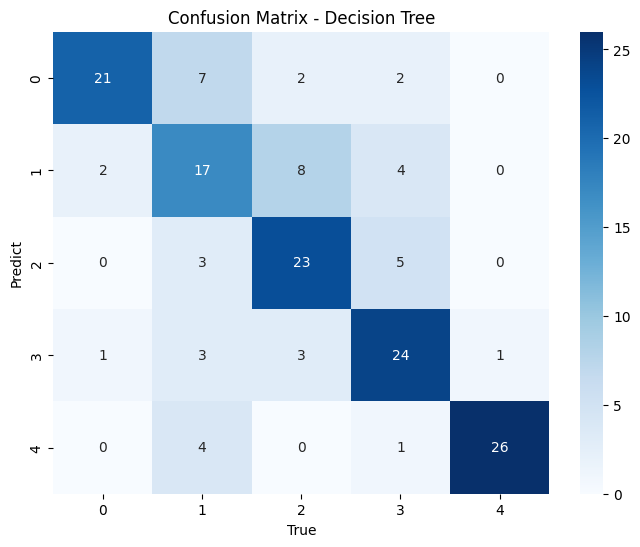

In [ ]:
# Visualisasi confusion matrix
cm = confusion_matrix(y_test_normal, y_pred_decision_tree)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### 2) Random Forest

In [ ]:
rf_model = RandomForestClassifier()

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [ 10, 15],
    "min_samples_leaf": [1, 2],
    "min_samples_split": [2, 5],
    "max_features": ["sqrt", "log2"],
    # "random_state": [42, 100, 200]
}

rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1)

rf_model.fit(X_train_normal, y_train_normal)

best_params = rf_model.best_params_
print(f"Best parameters: {best_params}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}


In [ ]:
y_pred_rf = rf_model.predict(X_test_normal)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90        32
         1.0       0.96      0.87      0.92        31
         2.0       0.90      0.90      0.90        31
         3.0       0.94      0.97      0.95        32
         4.0       1.00      0.97      0.98        31

    accuracy                           0.93       157
   macro avg       0.93      0.93      0.93       157
weighted avg       0.93      0.93      0.93       157



In [ ]:
evaluation(y_test_normal, y_pred_rf)

{'accuracy': 0.93, 'recall': 0.93, 'F1 score': 0.93, 'Precision score': 0.932}


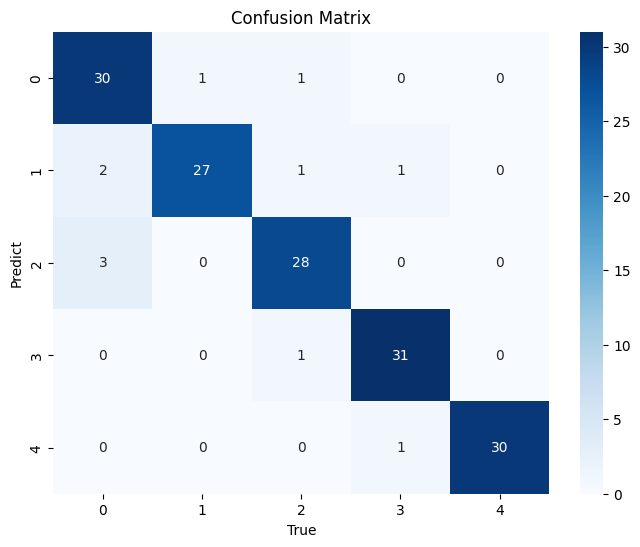

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### 3) XGBOOST

In [ ]:
xgb_model = XGBClassifier()

param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200],
    "gamma": [0, 0.1],
    "colsample_bytree": [0.7, 0.8],
}
xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)

xgb_model.fit(X_train_normal, y_train_normal)

best_params = xgb_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}


In [ ]:
y_pred_xgb = xgb_model.predict(X_test_normal)

# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.892
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90        32
         1.0       0.92      0.77      0.84        31
         2.0       0.87      0.84      0.85        31
         3.0       0.85      0.91      0.88        32
         4.0       0.97      1.00      0.98        31

    accuracy                           0.89       157
   macro avg       0.89      0.89      0.89       157
weighted avg       0.89      0.89      0.89       157



In [ ]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.892, 'recall': 0.892, 'F1 score': 0.891, 'Precision score': 0.893}


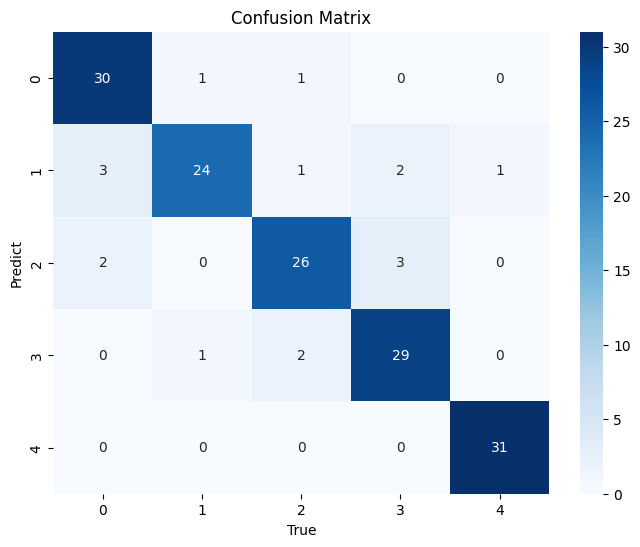

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### 4) SVM

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform, randint

svm_model = SVC(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': uniform(0.1, 10),  # Example range for C
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
    # Add other parameters as needed for tuning
}
svm_model = RandomizedSearchCV(svm_model, param_grid, n_iter=10, cv=5, n_jobs=-1)

svm_model.fit(X_train_normal, y_train_normal)

best_params = svm_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'C': 4.609558023372012, 'gamma': 'scale', 'kernel': 'poly'}


In [ ]:
y_pred_svm = svm_model.predict(X_test_normal)

# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_svm_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_svm_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_svm))


XGBoost Model:
Accuracy: 0.892
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.84      0.86        32
         1.0       0.90      0.84      0.87        31
         2.0       0.78      0.94      0.85        31
         3.0       0.93      0.81      0.87        32
         4.0       0.97      1.00      0.98        31

    accuracy                           0.89       157
   macro avg       0.89      0.89      0.89       157
weighted avg       0.89      0.89      0.89       157



In [ ]:
evaluation(y_test_normal,y_pred_svm)

{'accuracy': 0.885, 'recall': 0.885, 'F1 score': 0.885, 'Precision score': 0.89}


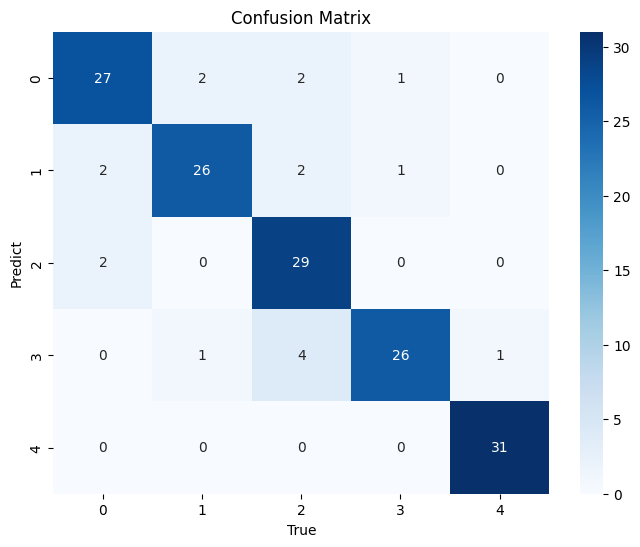

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

<a name="section_9"></a>
## 9) Mengevaluasi Hasil Pemodelan

Selanjutnya kita akan melakukan evaluasi data sekaligus membandingkan antar algoritma guna dengan tujuan mengetahui jenis model
algoritma yang menghasilkan hasil akurasi terbaik.

In [ ]:
import matplotlib.pyplot as plt

#dalah variabel yang menampung DataFrame yang dibuat dengan Pandas. DataFrame ini memiliki dua kolom yaitu 'Model' dan 'Accuracy'.
model_comp1 = pd.DataFrame({'Model': ['Decision Tree','Random Forest',
                                      'XGBoost','SVM'], 'Accuracy': [accuracy_decision_tree_smote*100,
                                      accuracy_rf_smote*100,accuracy_xgb_smote*100, accuracy_svm_smote*100]})

model_comp1.head() #menampilkan lima baris pertama dari DataFram

,Model,Accuracy
0,Decision Tree,70.701
1,Random Forest,94.900
2,XGBoost,88.500
3,SVM,43.312


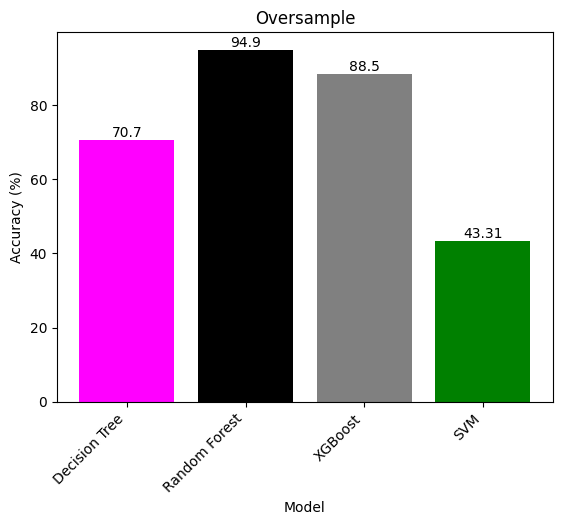

In [ ]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['fuchsia', 'black', 'gray', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
#memberikan informasi yang lebih detail dan jelas tentang nilai-nilai yang terkait dengan setiap batang, memudahkan dalam membaca dan memahami visualisasi data.
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [ ]:
model_comp2 = pd.DataFrame({'Model': ['Decision Tree','Random Forest',
                            'XGBoost','svm'], 'Accuracy' : [accuracy_decision_tree_smote_normal*100,
                            accuracy_rf_smote_normal*100,accuracy_xgb_smote_normal*100, accuracy_svm_smote_normal*100]})

model_comp2.head()

,Model,Accuracy
0,Decision Tree,70.701
1,Random Forest,94.900
2,XGBoost,88.500
3,svm,78.981


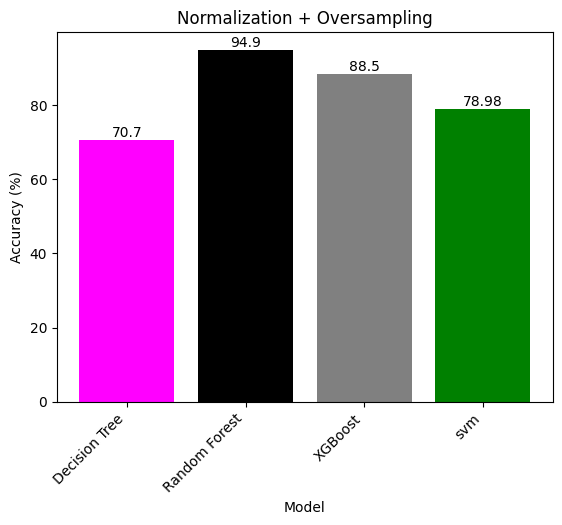

In [ ]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['fuchsia', 'black', 'gray', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [ ]:
model_comp3 = pd.DataFrame({'Model': ['Decision Tree','Random Forest',
                          'XGBoost','SVM'], 'Accuracy': [accuracy_decision_tree_smote_normal_Tun*100,
                          accuracy_rf_smote_normal_Tun*100,accuracy_xgb_smote_normal_Tun*100, accuracy_svm_smote_normal_Tun*100]})
#dalah variabel yang menampung DataFrame yang dibuat dengan Pandas. DataFrame ini memiliki dua kolom yaitu 'Model' dan 'Accuracy'.
model_comp3.head()

,Model,Accuracy
0,Decision Tree,70.701
1,Random Forest,93.000
2,XGBoost,89.200
3,SVM,89.200


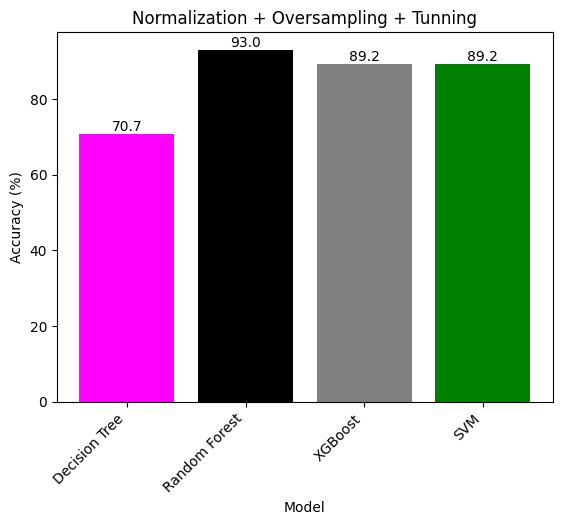

In [ ]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['fuchsia', 'black', 'gray', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling + Tunning')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca
#Tujuan dari potongan kode diatas adalah untuk membuat visualisasi yang membandingkan akurasi dari beberapa model klasifikasi dengan menggunakan diagram batang. Ini memudahkan untuk melihat dan membandingkan kinerja relatif dari setiap model yang diamati dalam konteks pemrosesan data tertentu (Normalization, Oversampling, dan Tunning).

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

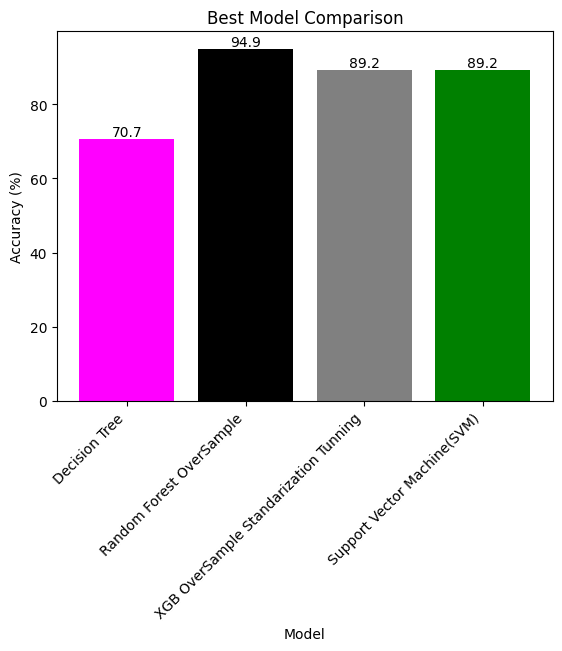

In [ ]:
# Data frame
model_compBest = pd.DataFrame({
'Model': ['Decision Tree', 'Random Forest OverSample',
'XGB OverSample Standarization Tunning','Support Vector Machine(SVM)' ],
'Accuracy': [accuracy_decision_tree_smote_normal_Tun*100, accuracy_rf_smote_normal*100,
accuracy_xgb_smote_normal_Tun*100, accuracy_svm_smote_normal_Tun*100]
})


# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots() #Membuat subplot atau gambar (figure) dan sumbu (axis) untuk memungkinkan penyesuaian lebih lanjut terhadap plot yang akan dibuat.
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['fuchsia', 'black', 'gray', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)') #Menambahkan label pada sumbu x (Model) dan sumbu y (Accuracy (%)) pada plot.
plt.title('Best Model Comparison')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height() #Untuk setiap batang dalam iterasi, kode ini mengambil nilai tinggi dari batang tersebut.
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()
#Tujuan dari potongan kode diatas adalah untuk memberikan informasi numerik yang tepat di atas setiap batang pada diagram batang. Ini memudahkan untuk melihat nilai-nilai yang diplotkan, membantu dalam analisis visual, dan memberikan pemahaman yang lebih baik tentang data yang direpresentasikan dalam plot.

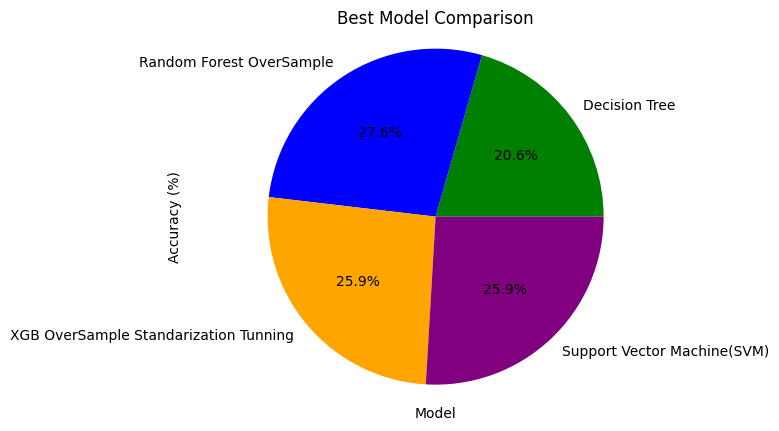

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas library

# Mengganti nilai kelas dengan label yang sesuai
model_compBest = pd.DataFrame({
'Model': ['Decision Tree', 'Random Forest OverSample',
'XGB OverSample Standarization Tunning','Support Vector Machine(SVM)' ],
'Accuracy': [accuracy_decision_tree_smote_normal_Tun*100, accuracy_rf_smote_normal*100,
accuracy_xgb_smote_normal_Tun*100, accuracy_svm_smote_normal_Tun*100]
})

# Membuat pie chart
plt.pie(model_compBest['Accuracy'], labels=model_compBest['Model'], autopct='%1.1f%%', colors=['green', 'blue', 'orange', 'purple'])
plt.title("Best Model Comparison")
plt.axis('equal')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparison')
plt.show()


<a name="section_10"></a>
## 10) Kesimpulan

Setelah melakukan percobaan dengan algoritma Decision Tree, Random Forest, XGBoost dan Support Vector Machine (SVM) serta menerapkan berbagai metode penanganan data seperti Random Oversampling SMOTE untuk mengatasi ketidakseimbangan data, menggunakan RandomSearchCV untuk tuning, dan normalisasi data, didapatkan hasil sebagai berikut:

- Klasifikasi menggunakan Random Oversampling SMOTE pada model Decision Tree menghasilkan akurasi sebesar 70.7%. Model Random Forest mencapai akurasi 94.9%, sedangkan model XGBoost memiliki akurasi 88.5%, dan 43.31% untuk model SVM sangat rendah sekali.

- Setelah normalisasi data dan penerapan Random Oversampling SMOTE, model Decision Tree tidak ada peningkatan jadi tetap di 70.7%. Model Random Forest tetap berada pada akurasi 94.9%, dan model XGBoost tetap berada pada 88.5%, dan untuk model SVM mengalami kenaikan pesat yaitu menjadi 88,54%.

- Melalui tuning klasifikasi menggunakan RandomSearchCV, normalisasi, dan Random Oversampling SMOTE, akurasi model Decision Tree tetap di angka 70.7%, sedangkan model Random Forest menurun menjadi 93.6%. Model XGBoost naik menjadi 89.2% begitupun SVM akurasinya naik mejadi 89.2%.

Dalam menangani ketidakseimbangan data, strategi optimal yang terbukti efektif adalah dengan menerapkan metode Random Oversampling SMOTE dengan tuning parameter menggunakan RandomSearchCV dan normalisasi data. Pendekatan ini memberikan peningkatan akurasi model yang signifikan terutama pada model Support Vector Machine(SVM) dan XGBoost, namun menunjukkan penurunan akurasi pada model Random Forest, dan tidak ada perubahan akurasi pada Decision Tree.

Secara keseluruhan, strategi penanganan ketidakseimbangan data dengan tuning parameter, normalisasi, dan oversampling dapat memberikan dampak yang signifikan terhadap performa model klasifikasi. Pemilihan model terbaik dan tuning parameter yang optimal dapat meningkatkan akurasi dan performa model secara keseluruhan.